<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">🧠 Handwritten Mathematical Symbols Recognition</h1>
  <h2 style="margin-top:8px;font-size:18px;font-weight:600;opacity:0.9;">Deep Learning | Transfer Learning | EfficientNetB0 | Image Classification</h2>
  <p style="margin:14px 0;font-size:16px;">This notebook focuses on recognizing handwritten mathematical symbols using deep learning. The dataset contains handwritten digits and operators such as plus, minus, multiply, divide, equal, and decimal. We will build a high-performance CNN model using EfficientNetB0 and train it using a clean and structured approach.</p>

  <div style="margin:10px 0;">
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;"><strong>Dataset:</strong> Handwritten Math Symbols</span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;"><strong>Model:</strong> EfficientNetB0</span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;"><strong>Goal:</strong> Achieve >90% accuracy</span>
  </div>

  <ul style="margin:14px 0 0 20px;">
    <li style="margin:6px 0;">🔹 Preprocess and clean the dataset</li>
    <li style="margin:6px 0;">🔹 Build an efficient CNN using transfer learning</li>
    <li style="margin:6px 0;">🔹 Train the model and evaluate performance</li>
    <li style="margin:6px 0;">🔹 Visualize results with accuracy curves and confusion matrix</li>
  </ul>

  <div style="margin-top:18px;padding-top:12px;border-top:1px solid rgba(233,240,255,0.18);opacity:0.9;font-size:14px;"><strong>Note:</strong> This notebook is designed to be beginner-friendly while maintaining professional standards.</div>
</div>


<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">
    🧠 Setup & Imports
  </h1>

  <h2 style="margin-top:8px;font-size:18px;font-weight:600;opacity:0.9;">
    Prepare the environment, load libraries, and define hyperparameters
  </h2>

  <p style="margin:14px 0;font-size:16px;">
    In this cell we import necessary libraries, set image size, batch size, and define training hyperparameters.
  </p>

 </div>

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

IMG_SIZE = 96
BATCH_SIZE = 32
EPOCHS = 25
SEED = 42

2026-01-17 13:06:32.553733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768655192.751199      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768655192.809024      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768655193.245799      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768655193.245833      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768655193.245836      24 computation_placer.cc:177] computation placer alr

<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">
    📁 Folder Structure & Image Count
  </h1>

  <h2 style="margin-top:8px;font-size:18px;font-weight:600;opacity:0.9;">
    Display number of images per class in train and eval folders
  </h2>

  <p style="margin:14px 0;font-size:16px;">
    This cell checks each class folder and prints the number of images inside.
    It helps to confirm dataset balance and structure.
  </p>

  <div style="margin:10px 0;">
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      📌 Train Path: /train
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      📌 Eval Path: /eval
    </span>
  </div>
  </div>

In [2]:
import os

def show_folder_info(base_path):
    print(f"\n📂 {base_path.upper()} DATA\n" + "-"*30)
    
    for class_name in sorted(os.listdir(base_path)):
        class_path = os.path.join(base_path, class_name)
        
        if os.path.isdir(class_path):
            num_images = len([
                img for img in os.listdir(class_path)
                if img.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            
            print(f"🗂️ {class_name:<20} → {num_images} images")

# Paths (Kaggle-style)
train_path = "/kaggle/input/handwritten-math-symbol-dataset/train"
eval_path  = "/kaggle/input/handwritten-math-symbol-dataset/eval"

show_folder_info(train_path)
show_folder_info(eval_path)



📂 /KAGGLE/INPUT/HANDWRITTEN-MATH-SYMBOL-DATASET/TRAIN DATA
------------------------------
🗂️ decimal              → 513 images
🗂️ div                  → 544 images
🗂️ eight                → 429 images
🗂️ equal                → 554 images
🗂️ five                 → 431 images
🗂️ four                 → 431 images
🗂️ minus                → 549 images
🗂️ nine                 → 430 images
🗂️ one                  → 432 images
🗂️ original number      → 19 images
🗂️ original sign        → 33 images
🗂️ other number         → 53 images
🗂️ other sign           → 29 images
🗂️ plus cleaned         → 545 images
🗂️ seven                → 430 images
🗂️ six                  → 429 images
🗂️ three                → 429 images
🗂️ times                → 555 images
🗂️ two                  → 430 images
🗂️ zero                 → 426 images

📂 /KAGGLE/INPUT/HANDWRITTEN-MATH-SYMBOL-DATASET/EVAL DATA
------------------------------
🗂️ decimal val          → 76 images
🗂️ div val              → 78 images
🗂️ eight   

<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">
    🧾 Class Mapping & Labels
  </h1>

  <h2 style="margin-top:8px;font-size:18px;font-weight:600;opacity:0.9;">
    Convert folder names into unified class labels
  </h2>

  <p style="margin:14px 0;font-size:16px;">
    The dataset contains multiple folders for the same symbol (like <code>plus cleaned</code> and <code>plus val</code>).
    This cell maps them into single unified labels and generates class names.
  </p>

  <div style="margin:10px 0;">
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 Total Classes: <strong>10</strong>
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 Mapping: Folder → Label
    </span>
  </div>


</div>


In [3]:
CLASS_MAP = {
    # digits
    "zero": "zero",
    "one": "one",
    "two": "two",
    "three": "three",
    "four": "four",
    "five": "five",
    "six": "six",
    "seven": "seven",
    "eight": "eight",
    "nine": "nine",

    # operators
    "plus cleaned": "plus",
    "plus val": "plus",
    "minus": "minus",
    "minus val": "minus",
    "times": "times",
    "times val": "times",
    "div": "div",
    "div val": "div",
    "equal": "equal",
    "equal val": "equal",
    "decimal": "decimal",
    "decimal val": "decimal",
}

CLASS_NAMES = sorted(set(CLASS_MAP.values()))
NUM_CLASSES = len(CLASS_NAMES)

label_to_index = {name: idx for idx, name in enumerate(CLASS_NAMES)}

print("Classes:", CLASS_NAMES)
print("Number of classes:", NUM_CLASSES)


Classes: ['decimal', 'div', 'eight', 'equal', 'five', 'four', 'minus', 'nine', 'one', 'plus', 'seven', 'six', 'three', 'times', 'two', 'zero']
Number of classes: 16


<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">
    📦 Load Dataset & Prepare Paths
  </h1>

  <h2 style="margin-top:8px;font-size:18px;font-weight:600;opacity:0.9;">
    Read image paths and convert folder names into labels
  </h2>

  <p style="margin:14px 0;font-size:16px;">
    This cell scans the training and validation folders, filters valid classes using <code>CLASS_MAP</code>, 
    and returns lists of image paths and labels.
  </p>

  <div style="margin:10px 0;">
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      📌 Train samples
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      📌 Validation samples
    </span>
  </div>


</div>


In [4]:
def load_data(base_path):
    image_paths = []
    labels = []

    for folder in os.listdir(base_path):
        if folder not in CLASS_MAP:
            continue

        class_name = CLASS_MAP[folder]
        label = label_to_index[class_name]

        folder_path = os.path.join(base_path, folder)
        for img in os.listdir(folder_path):
            if img.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(folder_path, img))
                labels.append(label)

    return image_paths, labels


train_dir = "/kaggle/input/handwritten-math-symbol-dataset/train"
eval_dir = "/kaggle/input/handwritten-math-symbol-dataset/eval"

train_paths, train_labels = load_data(train_dir)
val_paths, val_labels = load_data(eval_dir)

print("Train samples:", len(train_paths))
print("Validation samples:", len(val_paths))


Train samples: 7557
Validation samples: 1010


<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">
    🧹 Preprocessing & Dataset Pipeline
  </h1>

  <h2 style="margin-top:8px;font-size:18px;font-weight:600;opacity:0.9;">
    Load images, resize, normalize and create TensorFlow datasets
  </h2>

  <p style="margin:14px 0;font-size:16px;">
    This cell defines preprocessing steps and builds optimized TensorFlow pipelines for training and validation.
    We convert grayscale images to RGB and apply EfficientNet preprocessing.
  </p>

  <div style="margin:10px 0;">
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 Resize: 96x96
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 Batch: 32
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 EfficientNet Preprocess
    </span>
  </div>

</div>


In [5]:
def preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=1)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.image.grayscale_to_rgb(img)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)  # ✅ CRITICAL
    return img, label


train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = (
    train_ds
    .shuffle(1000, seed=SEED)
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
val_ds = (
    val_ds
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

I0000 00:00:1768655207.334407      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1768655207.338301      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">
    🎛️ Data Augmentation
  </h1>

  <h2 style="margin-top:8px;font-size:18px;font-weight:600;opacity:0.9;">
    Improve model robustness with random transformations
  </h2>

  <p style="margin:14px 0;font-size:16px;">
    Augmentation helps the model generalize better by introducing random rotations, zooms, and translations during training.
  </p>

  <div style="margin:10px 0;">
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 Rotation: 10%
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 Zoom: 10%
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 Translation: 10%
    </span>
  </div>
</div>


In [6]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
])

<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">
    🧠 Build & Compile Model
  </h1>

  <h2 style="margin-top:8px;font-size:18px;font-weight:600;opacity:0.9;">
    Transfer Learning with EfficientNetB0 + Custom Head
  </h2>

  <p style="margin:14px 0;font-size:16px;">
    We use EfficientNetB0 pretrained on ImageNet as the base model.  
    The base is frozen during initial training to leverage learned features.  
    A custom classification head is added on top for our symbol classes.
  </p>

  <div style="margin:10px 0;">
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 EfficientNetB0 (ImageNet)
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 Dense 256 + Dropout
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔹 Learning Rate 1e-4
    </span>
  </div>
</div>


In [7]:
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = False

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 3, 3, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,386,739 (16.73 MB)

 Trainable params: 334,608 (1.28 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">
    🚀 Training the Model
  </h1>

  <h2 style="margin-top:8px;font-size:18px;font-weight:600;opacity:0.9;">
    Use callbacks to stop early & reduce learning rate
  </h2>

  <p style="margin:14px 0;font-size:16px;">
    We use <strong>EarlyStopping</strong> to avoid overfitting and <strong>ReduceLROnPlateau</strong> to lower learning rate when the model stops improving.
  </p>

  <div style="margin:10px 0;">
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      ⏳ EarlyStopping (patience=5)
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      🔻 ReduceLROnPlateau (factor=0.3)
    </span>
    <span style="display:inline-block;padding:7px 14px;margin:0 8px 8px 0;border-radius:999px;font-size:13px;font-weight:600;background:rgba(233,240,255,0.10);border:1px solid rgba(233,240,255,0.16);color:#e9f0ff;">
      📌 Epochs: 25
    </span>
  </div>

</div>


In [8]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.3)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/25


E0000 00:00:1768655221.359251      24 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1768655223.095670      66 cuda_dnn.cc:529] Loaded cuDNN version 91002


237/237 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.4330 - loss: 2.0848 - val_accuracy: 0.6158 - val_loss: 1.3564 - learning_rate: 1.0000e-04
Epoch 2/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5919 - loss: 1.3561 - val_accuracy: 0.7366 - val_loss: 0.8320 - learning_rate: 1.0000e-04
Epoch 3/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6997 - loss: 0.9889 - val_accuracy: 0.7832 - val_loss: 0.6700 - learning_rate: 1.0000e-04
Epoch 4/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7491 - loss: 0.8087 - val_accuracy: 0.8168 - val_loss: 0.5147 - learning_rate: 1.0000e-04
Epoch 5/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7906 - loss: 0.6602 - val_accuracy: 0.8347 - val_loss: 0.5335 - learning_rate: 1.0000e-04
Epoch 6/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8146 - loss: 0.5990 - val_accuracy: 0.8287 - val_loss: 0.5181 - learning_rate: 1.0000e-04
Epoch 7/25
237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8

<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">
    📌 Final Accuracy
  </h1>

  <p style="margin:14px 0;font-size:16px;">
    Here we print the final training and validation accuracy after the last epoch.
  </p>
</div>


In [9]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print("Final Train Accuracy:", train_acc)
print("Final Validation Accuracy:", val_acc)


Final Train Accuracy: 0.9131930470466614
Final Validation Accuracy: 0.9148514866828918


<div style="max-width:900px;margin:0 auto;border-radius:20px;padding:24px;box-shadow:0 18px 40px rgba(0,0,0,0.25);background:linear-gradient(135deg,#0b1020,#1b2a4a);color:#e9f0ff;line-height:1.6;">
  <h1 style="margin:0;font-size:34px;font-weight:900;letter-spacing:0.5px;">
    📈 Training Curves
  </h1>

  <p style="margin:14px 0;font-size:16px;">
    Plotting the training & validation accuracy and loss to visualize model performance.
  </p>

</div>

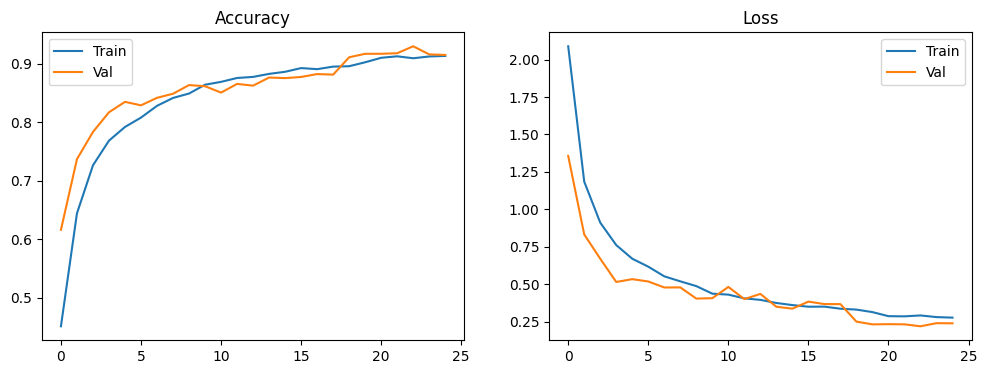

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.legend()

plt.show()

<div style="
  max-width: 900px;
  margin: 30px auto;
  border-radius: 20px;
  padding: 24px;
  box-shadow: 0 18px 40px rgba(0,0,0,0.25);
  background: linear-gradient(135deg, #0b1020, #1b2a4a);
  color: #e9f0ff;
  line-height: 1.6;
">

  <h1 style="margin: 0; font-size: 34px; font-weight: 900; letter-spacing: 0.5px;">
    Thank You!
  </h1>

  <p style="margin: 14px 0; font-size: 16px;">
    Thanks for visiting this notebook.  
    I hope you found the Handwritten Mathematical Symbols Recognition project helpful and inspiring.
    Feel free to ⭐ the notebook, leave feedback, or connect for more ML projects.
  </p>

  <div style="margin-top: 18px; padding-top: 12px; border-top: 1px solid rgba(233,240,255,0.18); opacity: 0.9; font-size: 14px;">
    <strong>Happy Learning!</strong> 🚀
  </div>
</div>
